#biar cepet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


In [3]:
def load_data():
  data = pd.read_excel('stemming_label_2.xlsx')
  return data

df = load_data()
df.head()

,isi,label
0,bonus guna metode bayar transaksi sesuai prose...,NEGATIVE
1,suka belanja tokopedia diskon kembali dana bar...,NEGATIVE
2,tokopedia keren gratis ongkos kirim pelit prom...,POSITIVE
3,baru buruk kali buka produk sebentar beranda u...,NEGATIVE
4,mohon sembunyi toko aktif produk habis jual ak...,NEGATIVE


In [4]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(df['isi'],df['label'],test_size=0.2, random_state=10)

In [12]:
## Creating bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(train_x)

print('Number of feature_words: ', len(cv.get_feature_names_out()))

Number of feature_words:  1690


In [13]:
cv.get_feature_names_out()

array(['abai', 'abal', 'academy', ..., 'youtube', 'zakat', 'zoning'],
      dtype=object)

In [14]:
X_train = cv.fit_transform(train_x)
X_test = cv.transform(test_x)

In [15]:
print("Vocabulary: ", cv.vocabulary_)

Vocabulary:  {'tokopedia': 1573, 'repot': 1263, 'seleksi': 1349, 'orang': 1058, 'buka': 222, 'toko': 1568, 'beli': 161, 'barang': 137, 'kirim': 723, 'produk': 1190, 'sesuai': 1382, 'prosedur': 1200, 'susah': 1477, 'pesan': 1141, 'sedia': 1339, 'member': 915, 'gold': 474, 'silver': 1407, 'turun': 1611, 'hapus': 508, 'pasang': 1096, 'bayar': 147, 'alfamart': 42, 'kena': 690, 'biaya': 182, 'administrasi': 10, 'menit': 929, 'transaksi': 1588, 'batal': 141, 'dana': 295, 'ubah': 1618, 'cair': 237, 'saldo': 1305, 'kembali': 686, 'rekening': 1255, 'pindah': 1150, 'dompet': 351, 'digital': 336, 'aplikasi': 78, 'sampah': 1310, 'biar': 180, 'main': 863, 'manfaat': 885, 'sistem': 1420, 'promosi': 1199, 'promo': 1197, 'kali': 651, 'tentu': 1535, 'kecewa': 672, 'hotel': 533, 'murah': 973, 'hasil': 513, 'profesional': 1192, 'buruk': 231, 'rusak': 1295, 'jual': 630, 'tuju': 1600, 'putus': 1218, 'keluh': 683, 'selesai': 1351, 'rugi': 1290, 'paksa': 1082, 'terima': 1538, 'tahan': 1484, 'layan': 808, 'gr

In [16]:
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(train_y)
y_test = Encoder.transform(test_y)

In [17]:
print("x_train : \n",X_train)
print("\n x_test : \n",X_test)
print("\n y_train : \n",y_train)
print("\n y_test : \n",y_test)

x_train : 
   (0, 1573)	1
  (0, 1263)	1
  (0, 1349)	1
  (0, 1058)	1
  (0, 222)	1
  (0, 1568)	1
  (0, 161)	1
  (0, 137)	2
  (0, 723)	2
  (0, 1190)	1
  (0, 1382)	1
  (0, 1200)	2
  (0, 1477)	1
  (0, 1141)	1
  (0, 1339)	1
  (0, 915)	1
  (0, 474)	1
  (0, 1407)	1
  (0, 1611)	1
  (0, 508)	1
  (0, 1096)	1
  (1, 1573)	2
  (1, 1058)	1
  (1, 161)	1
  (1, 147)	3
  :	:
  (798, 1324)	1
  (798, 1425)	1
  (798, 729)	1
  (798, 561)	1
  (798, 475)	1
  (798, 1163)	1
  (798, 103)	1
  (798, 1512)	2
  (798, 1602)	1
  (798, 557)	1
  (799, 630)	2
  (799, 1491)	2
  (799, 966)	2
  (799, 1029)	1
  (799, 1410)	1
  (799, 419)	1
  (799, 931)	2
  (799, 668)	1
  (799, 719)	2
  (799, 999)	1
  (799, 1643)	1
  (799, 275)	1
  (799, 196)	1
  (799, 1445)	1
  (799, 240)	1

 x_test : 
   (0, 113)	1
  (0, 256)	1
  (0, 966)	1
  (0, 1201)	1
  (0, 1338)	1
  (0, 1468)	1
  (0, 1573)	1
  (1, 53)	1
  (1, 78)	1
  (1, 137)	1
  (1, 161)	1
  (1, 672)	1
  (1, 740)	1
  (1, 776)	2
  (1, 1254)	1
  (1, 1270)	1
  (1, 1274)	1
  (1, 1351)	1
  (

In [18]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (800, 1690)
X_test_shape :  (200, 1690)
y_train_shape :  (800,)
y_test_shape :  (200,)


#Multinomial Naive Bayes

In [ ]:
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

MultinomialNB()

In [ ]:
scores = cross_val_score(MNB, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print("K-Fold Mean -> ",cross_val_score(MNB, X_train, y_train, cv=10).mean())

[0.8375 0.9    0.8375 0.8625 0.8875 0.8875 0.875  0.8875 0.8625 0.8625]
K-Fold Mean ->  0.8699999999999999


In [ ]:
MNB_pred = MNB.predict(X_test)

In [ ]:
print(confusion_matrix(MNB_pred, y_test))
print("MNB Accuracy Score -> ",accuracy_score(y_test, MNB_pred)*100)
print("MNB Recall Score -> ",recall_score(y_test, MNB_pred)*100)
print("MNB Precision Score -> ",precision_score(y_test, MNB_pred)*100)
print("MNB f1 Score -> ",f1_score(y_test, MNB_pred)*100)

[[94 20]
 [14 72]]
MNB Accuracy Score ->  83.0
MNB Recall Score ->  78.26086956521739
MNB Precision Score ->  83.72093023255815
MNB f1 Score ->  80.89887640449437


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       108
           1       0.84      0.78      0.81        92

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200


Confusion Matrix:


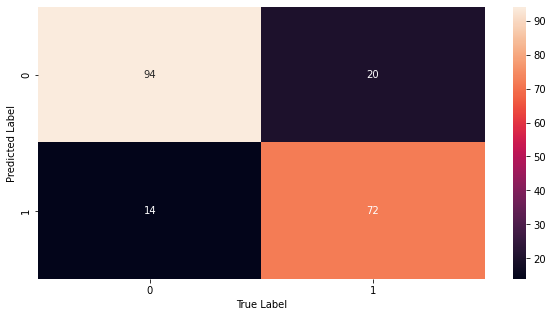



True Positive :  72
True Negative :  94
False Positive :  14
False Negative  :  20


In [ ]:
print("Classification Report:")
print(classification_report(y_test, MNB_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(MNB_pred, y_test), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(y_test, MNB_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [ ]:
mae = mean_absolute_error(y_test, MNB_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.17


In [ ]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_MNB = pd.DataFrame({'prediksi':MNB_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_MNB['prediksi'].value_counts()/df_result_MNB['prediksi'].count()*100)
df_persen_svm

,prediksi
0,57.00%
1,43.00%


#Bernoulli Naive Bayes

In [ ]:
BNB = BernoulliNB()
BNB.fit(X_train, y_train)

BernoulliNB()

In [ ]:
scores = cross_val_score(BNB, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print("K-Fold Mean -> ",cross_val_score(BNB, X_train, y_train, cv=10).mean())

[0.85   0.9    0.8125 0.8625 0.8875 0.9125 0.8625 0.9125 0.8625 0.925 ]
K-Fold Mean ->  0.8787499999999999


In [ ]:
BNB_pred = BNB.predict(X_test)

In [ ]:
print(confusion_matrix(BNB_pred, y_test))
print("BNB Accuracy Score -> ",accuracy_score(y_test, BNB_pred)*100)
print("BNB Recall Score -> ",recall_score(y_test, BNB_pred)*100)
print("BNB Precision Score -> ",precision_score(y_test, BNB_pred)*100)
print("BNB f1 Score -> ",f1_score(y_test, BNB_pred)*100)

[[92 16]
 [16 76]]
BNB Accuracy Score ->  84.0
BNB Recall Score ->  82.6086956521739
BNB Precision Score ->  82.6086956521739
BNB f1 Score ->  82.6086956521739


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       108
           1       0.83      0.83      0.83        92

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200


Confusion Matrix:


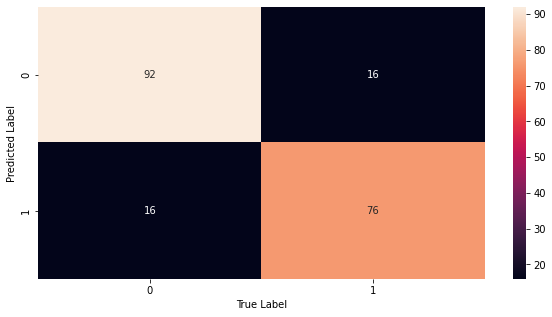



True Positive :  76
True Negative :  92
False Positive :  16
False Negative  :  16


In [ ]:
print("Classification Report:")
print(classification_report(y_test, BNB_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(BNB_pred, y_test), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(y_test, BNB_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [ ]:
mae = mean_absolute_error(y_test, BNB_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.16


In [ ]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_BNB = pd.DataFrame({'prediksi':BNB_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_BNB['prediksi'].value_counts()/df_result_BNB['prediksi'].count()*100)
df_persen_svm

,prediksi
0,54.00%
1,46.00%


#Hitung nilai C

In [ ]:
for c in [0.01, 0.05, 0.25, 0.5, 1, 1.01, 1.05, 1.25, 1.5, 2, 2.01, 2.05, 2.25, 2.5, 3]: # Menghitung nilai C
	sv = SVC(C=c)
	sv.fit(X_train, train_y)
	print('Accuracy fot C=%s: %s'
	%(c,accuracy_score(test_y, sv.predict(X_test)))) 

Accuracy fot C=0.01: 0.54
Accuracy fot C=0.05: 0.745
Accuracy fot C=0.25: 0.82
Accuracy fot C=0.5: 0.84
Accuracy fot C=1: 0.85
Accuracy fot C=1.01: 0.85
Accuracy fot C=1.05: 0.85
Accuracy fot C=1.25: 0.855
Accuracy fot C=1.5: 0.845
Accuracy fot C=2: 0.85
Accuracy fot C=2.01: 0.85
Accuracy fot C=2.05: 0.855
Accuracy fot C=2.25: 0.86
Accuracy fot C=2.5: 0.855
Accuracy fot C=3: 0.855


# Linear

In [ ]:
linear = SVC(kernel='linear', C=2)
linear.fit(X_train, y_train)

SVC(C=2, kernel='linear')

In [ ]:
scores = cross_val_score(linear, X_train, y_train, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(linear,X_train, y_train, cv=10).mean())

[0.8625 0.8375 0.8125 0.875  0.85   0.825  0.8125 0.8    0.85   0.8125]
K-Fold Mean ->  0.8337499999999999


In [ ]:
linear_pred = linear.predict(X_test)

In [ ]:
print(confusion_matrix(linear_pred, y_test))
print("SVM Accuracy Score -> ",accuracy_score(y_test, linear_pred)*100)
print("SVM Recall Score -> ",recall_score(y_test, linear_pred)*100)
print("SVM Precision Score -> ",precision_score(y_test, linear_pred)*100)
print("SVM f1 Score -> ",f1_score(y_test, linear_pred)*100)

[[87 15]
 [21 77]]
SVM Accuracy Score ->  82.0
SVM Recall Score ->  83.69565217391305
SVM Precision Score ->  78.57142857142857
SVM f1 Score ->  81.05263157894737


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       108
           1       0.79      0.84      0.81        92

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200


Confusion Matrix:


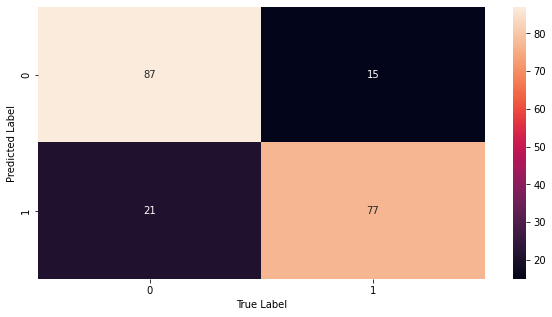



True Positive :  77
True Negative :  87
False Positive :  21
False Negative  :  15


In [ ]:
print("Classification Report:")
print(classification_report(y_test, linear_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(linear_pred, y_test), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(y_test, linear_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [ ]:
mae = mean_absolute_error(y_test, linear_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.18


In [ ]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_linear = pd.DataFrame({'prediksi':linear_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_linear['prediksi'].value_counts()/df_result_linear['prediksi'].count()*100)
df_persen_svm

,prediksi
0,51.00%
1,49.00%


# Polynomial 

In [ ]:
poly = SVC(kernel='poly', C=2)
poly.fit(X_train, y_train)

SVC(C=2, kernel='poly')

In [ ]:
scores = cross_val_score(poly, X_train, y_train, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(poly,X_train, y_train, cv=10).mean())

[0.6625 0.775  0.625  0.6    0.6625 0.6125 0.6875 0.6625 0.625  0.6625]
K-Fold Mean ->  0.6575


In [ ]:
poly_pred = poly.predict(X_test)

In [ ]:
print(confusion_matrix(poly_pred, y_test))
print("SVM Accuracy Score -> ",accuracy_score(y_test, poly_pred)*100)
print("SVM Recall Score -> ",recall_score(y_test, poly_pred)*100)
print("SVM Precision Score -> ",precision_score(y_test, poly_pred)*100)
print("SVM f1 Score -> ",f1_score(y_test, poly_pred)*100)

[[50  7]
 [58 85]]
SVM Accuracy Score ->  67.5
SVM Recall Score ->  92.3913043478261
SVM Precision Score ->  59.44055944055944
SVM f1 Score ->  72.34042553191489


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.46      0.61       108
           1       0.59      0.92      0.72        92

    accuracy                           0.68       200
   macro avg       0.74      0.69      0.66       200
weighted avg       0.75      0.68      0.66       200


Confusion Matrix:


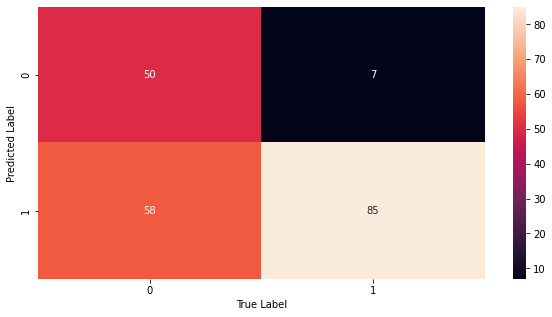



True Positive :  85
True Negative :  50
False Positive :  58
False Negative  :  7


In [ ]:
print("Classification Report:")
print(classification_report(y_test, poly_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(poly_pred, y_test), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(y_test, poly_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [ ]:
mae = mean_absolute_error(y_test, poly_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.325


In [ ]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_poly = pd.DataFrame({'prediksi':poly_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_poly['prediksi'].value_counts()/df_result_poly['prediksi'].count()*100)
df_persen_svm

,prediksi
1,71.50%
0,28.50%


# Radial Basis Function

In [ ]:
rbf = SVC(kernel='rbf', C=2, gamma=0.50 )
rbf.fit(X_train, y_train)

SVC(C=2, gamma=0.5)

In [ ]:
scores = cross_val_score(rbf, X_train, y_train, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(rbf,X_train, y_train, cv=10).mean())

[0.6625 0.625  0.575  0.5875 0.5625 0.6125 0.6    0.5875 0.575  0.5375]
K-Fold Mean ->  0.5925


In [ ]:
rbf_pred = rbf.predict(X_test)

In [ ]:
print(confusion_matrix(rbf_pred, y_test))
print("SVM Accuracy Score -> ",accuracy_score(y_test, rbf_pred)*100)
print("SVM Recall Score -> ",recall_score(y_test, rbf_pred)*100)
print("SVM Precision Score -> ",precision_score(y_test, rbf_pred)*100)
print("SVM f1 Score -> ",f1_score(y_test, rbf_pred)*100)

[[106  69]
 [  2  23]]
SVM Accuracy Score ->  64.5
SVM Recall Score ->  25.0
SVM Precision Score ->  92.0
SVM f1 Score ->  39.31623931623932


Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.98      0.75       108
           1       0.92      0.25      0.39        92

    accuracy                           0.65       200
   macro avg       0.76      0.62      0.57       200
weighted avg       0.75      0.65      0.59       200


Confusion Matrix:


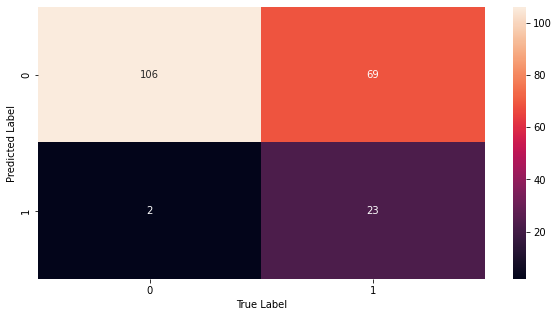



True Positive :  23
True Negative :  106
False Positive :  2
False Negative  :  69


In [ ]:
print("Classification Report:")
print(classification_report(y_test, rbf_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(rbf_pred, y_test), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(y_test, rbf_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)



In [ ]:
mae = mean_absolute_error(y_test, rbf_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.355


In [ ]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_rbf = pd.DataFrame({'prediksi':rbf_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_rbf['prediksi'].value_counts()/df_result_rbf['prediksi'].count()*100)
df_persen_svm

,prediksi
0,87.50%
1,12.50%


# Sigmoid

In [ ]:
sig = SVC(kernel='sigmoid', C=3)
sig.fit(X_train, y_train)

SVC(C=3, kernel='sigmoid')

In [ ]:
scores = cross_val_score(sig, X_train, y_train, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(sig,X_train, y_train, cv=10).mean())

[0.85   0.8375 0.8375 0.7875 0.85   0.825  0.825  0.8125 0.775  0.8375]
K-Fold Mean ->  0.8237500000000001


In [ ]:
sig_pred = sig.predict(X_test)

In [ ]:
print(confusion_matrix(sig_pred, y_test))
print("SVM Accuracy Score -> ",accuracy_score(y_test, sig_pred)*100)
print("SVM Recall Score -> ",recall_score(y_test, sig_pred)*100)
print("SVM Precision Score -> ",precision_score(y_test, sig_pred)*100)
print("SVM f1 Score -> ",f1_score(y_test, sig_pred)*100)

[[89 18]
 [19 74]]
SVM Accuracy Score ->  81.5
SVM Recall Score ->  80.43478260869566
SVM Precision Score ->  79.56989247311827
SVM f1 Score ->  80.0


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       108
           1       0.80      0.80      0.80        92

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.82      0.81      0.82       200


Confusion Matrix:


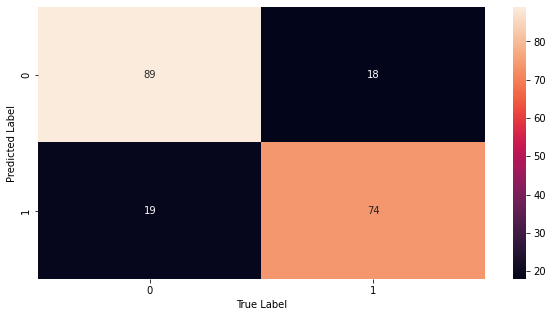



True Positive :  74
True Negative :  89
False Positive :  19
False Negative  :  18


In [ ]:
print("Classification Report:")
print(classification_report(y_test, sig_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(sig_pred, y_test), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(y_test, sig_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [ ]:
mae = mean_absolute_error(y_test, sig_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.185


In [ ]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_sig = pd.DataFrame({'prediksi':sig_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_sig['prediksi'].value_counts()/df_result_sig['prediksi'].count()*100)
df_persen_svm

,prediksi
0,53.50%
1,46.50%
